In [ ]:
# Black Friday EDA and Feature 

### Libraries 

In [ ]:
#manipulation data
import numpy as np
import pandas as pd

#visualization data
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

#Encoding data
from sklearn.preprocessing import LabelEncoder

# splitting data
from sklearn.model_selection import train_test_split

## feature Scaling 
from sklearn.preprocessing import StandardScaler

#Default theme
matplotlib.rcParams['figure.figsize'] = (12,8)

## Problem Statement
A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month. The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

In [2]:
#importing the train dataset
df_train = pd.read_csv('blackFriday_train.csv')
df_train.head() 
df_train.shape

(550068, 12)

In [3]:
#importing the test dataset
df_test = pd.read_csv('blackFriday_test.csv')
df_test.head()
df_test.shape

(233599, 11)

In [4]:
#merge both dataset
df=pd.concat([df_train, df_test])
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


### Basic Info

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


In [6]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
mean,1.003029e+06,8.079300,0.409777,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,6.522206,0.491793,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [7]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [8]:
df.drop(['User_ID'], axis=1, inplace=True)
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


## Handing The missing Value

In [9]:
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
dtype: int64

In [10]:

## Replace the missing values with mode
df['Product_Category_2']=df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0])

In [11]:
df['Product_Category_2'].isnull().sum()

np.int64(0)

In [12]:
## Replace the missing values with mode
df['Product_Category_3']=df['Product_Category_3'].fillna(df['Product_Category_2'].mode()[0])

In [13]:
df['Product_Category_3'].isnull().sum()

np.int64(0)

In [14]:
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2                 0
Product_Category_3                 0
Purchase                      233599
dtype: int64

## Encoding

In [15]:
le = LabelEncoder()

In [16]:
df.dtypes

Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                      float64
dtype: object

In [17]:
df['Age'].value_counts()

Age
26-35    313015
36-45    156724
18-25    141953
46-50     65278
51-55     54784
55+       30579
0-17      21334
Name: count, dtype: int64

In [18]:
### Handle categorical feature Gender
df["Gender"] = le.fit_transform(df["Gender"]) # Female --> 0, Male -->1

In [19]:
### Handle categorical feature Age
df["Age"] = le.fit_transform(df["Age"]) # 0-17  --> 0, 18-25 -->1, 26-35 -->2, 36-45 -->3, 46-50 -->4, 51-55 -->5, 55+-->6 

In [20]:
df.dtypes

Product_ID                     object
Gender                          int64
Age                             int64
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                      float64
dtype: object

In [21]:
##fixing categorical City_categort
df_city = pd.get_dummies(df['City_Category'], drop_first=True).astype(int) # We use drop_first because if b = c =0 that means a =1. So we don't need the three categorie, B ,C We fully describe the dateset. 
df_city.head()

,B,C
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1


In [22]:
df = pd.concat([df, df_city], axis=1)

In [23]:
#droping the  City_Category 
df.drop(['City_Category'], axis=1, inplace=True)

In [24]:
#fixing the Stay_In_Current_City_Years feature
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].replace({'4+':4})

In [25]:
#coverting the data type
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].astype(int)

In [26]:
df.dtypes

Product_ID                     object
Gender                          int64
Age                             int64
Occupation                      int64
Stay_In_Current_City_Years      int64
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                      float64
B                               int64
C                               int64
dtype: object

## EDA

In [27]:
df.columns

Index(['Product_ID', 'Gender', 'Age', 'Occupation',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase', 'B', 'C'],
      dtype='object')

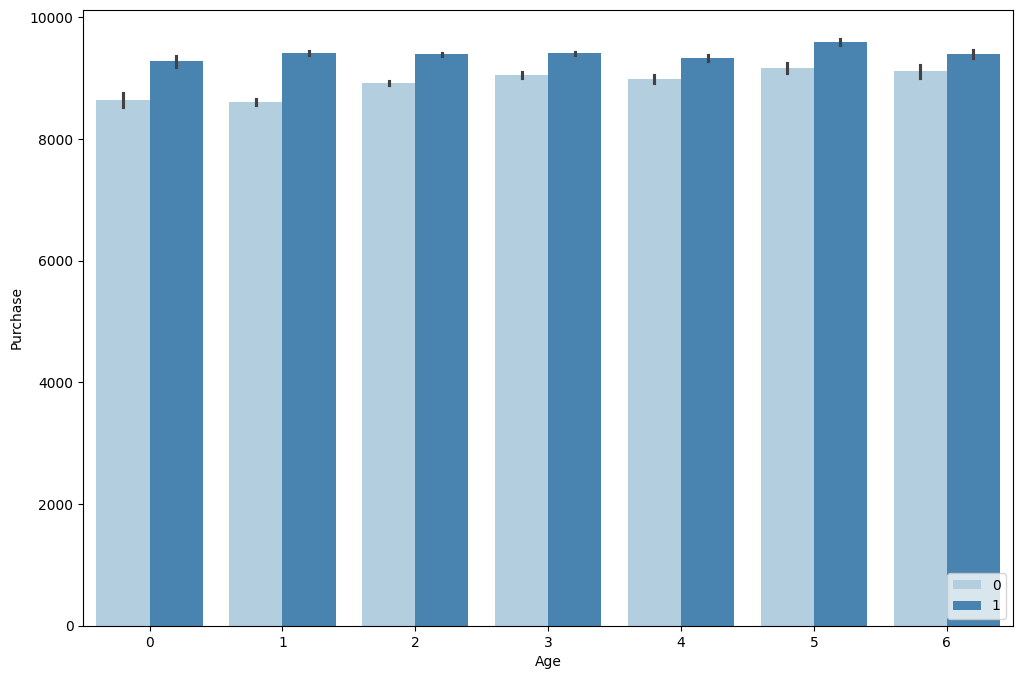

In [30]:
# age vs Purchase
sns.barplot(x='Age', y='Purchase', hue='Gender', data=df, palette="Blues")
plt.legend(loc='lower right')


Most of the men are purchase than women especially the age range between 51-55 men are purchased most

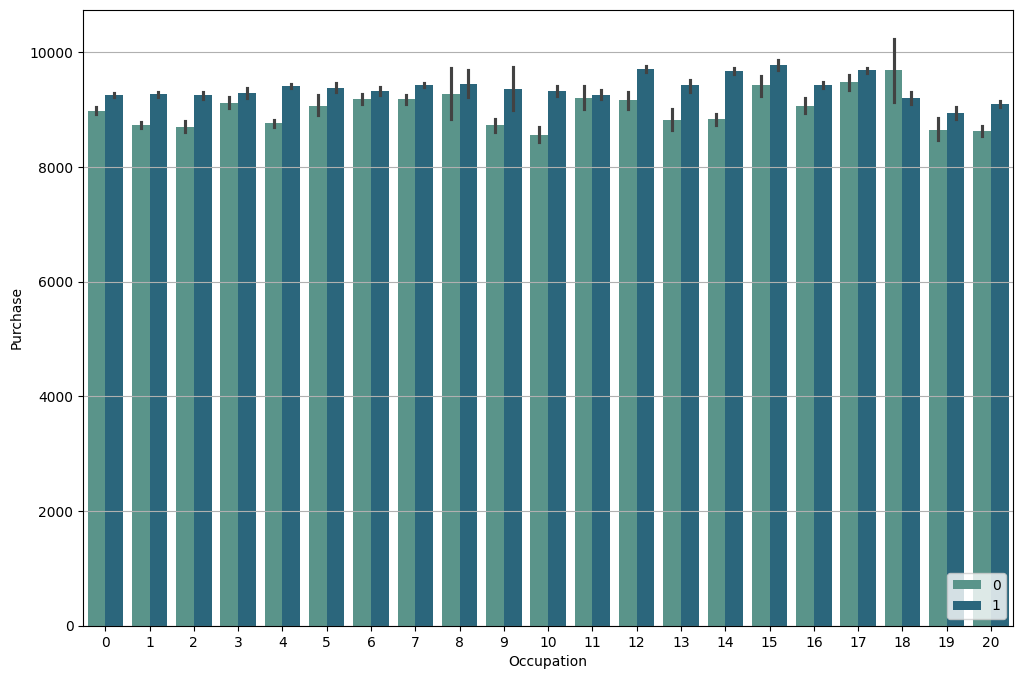

In [ ]:
# Occupation vs purchase
sns.barplot(x='Occupation', y='Purchase', hue='Gender', data=df, palette="crest")
plt.legend(loc='lower right')

Here the most purchase by a occupation which is label 18 women.

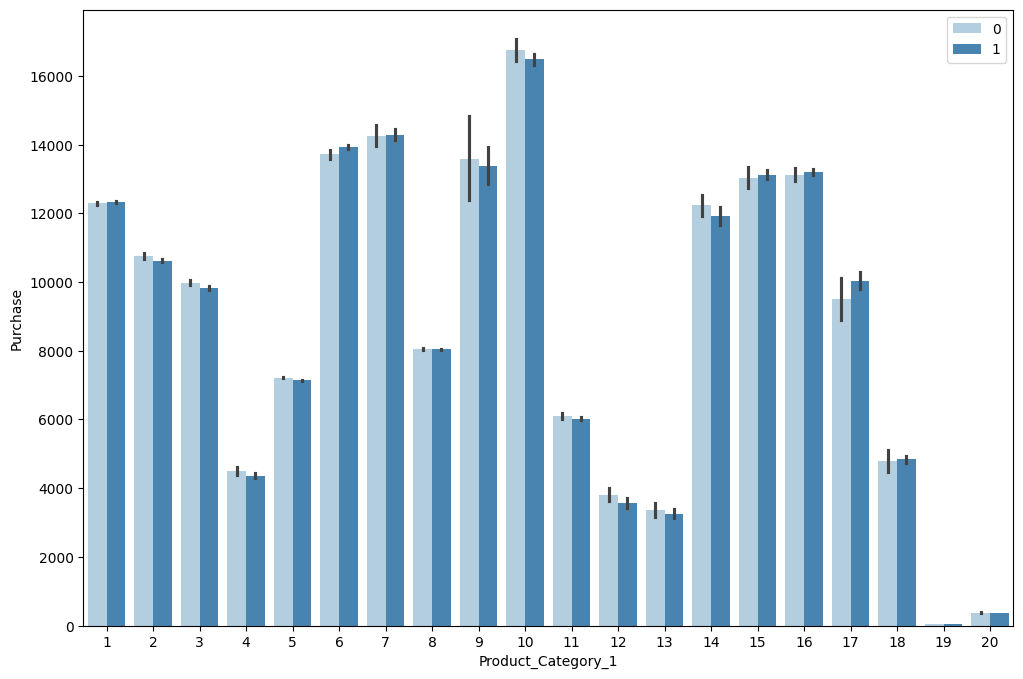

In [41]:
#visualization of Product_Category_1 vs purchase
sns.barplot(x='Product_Category_1', y='Purchase', hue='Gender', data=df, palette="Blues")
plt.legend(loc='best')

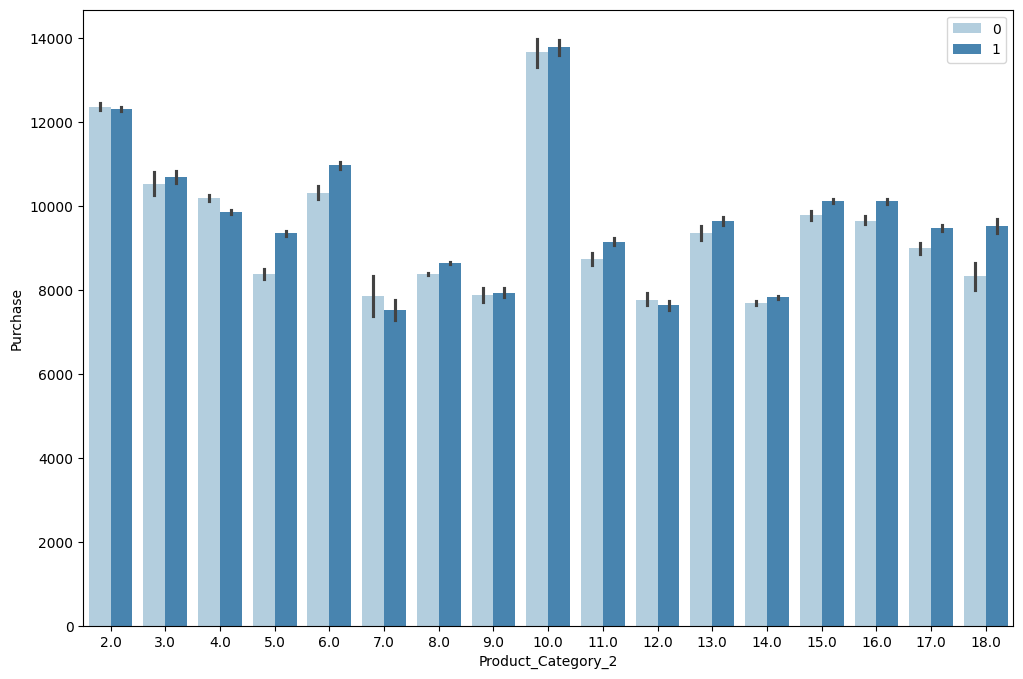

In [43]:
#visualization of Product_Category_2 vs purchase
sns.barplot(x='Product_Category_2', y='Purchase', hue='Gender', data=df, palette="Blues")
plt.legend(loc='best')

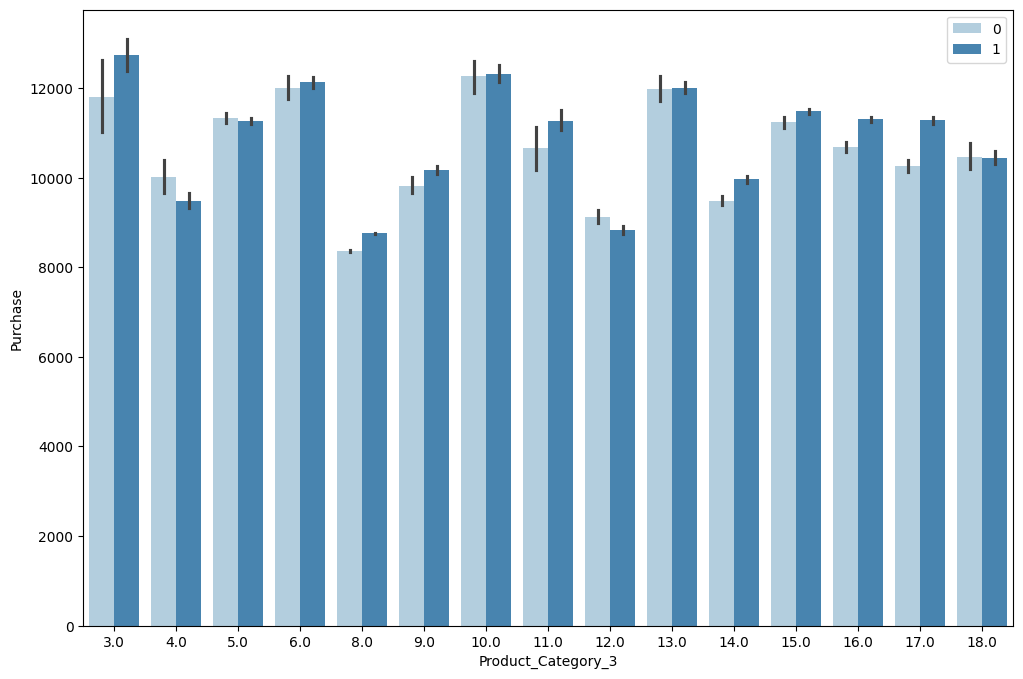

In [42]:
#visualization of Product_Category_3 vs purchase
sns.barplot(x='Product_Category_3', y='Purchase', hue='Gender', data=df, palette="Blues")
plt.legend(loc='best')

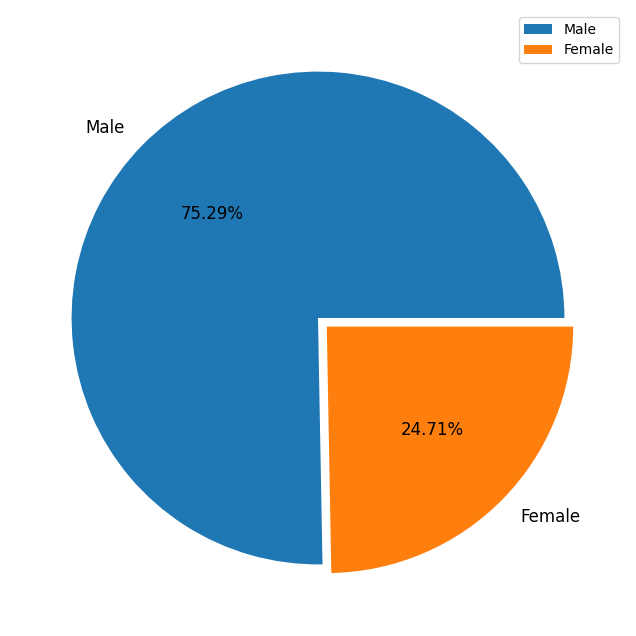

In [95]:
#pie chart female vs male
gender_data = df.Gender.value_counts()

gender_name = (df.Gender.value_counts().index).map({1:'Male', 0:'Female'})
plt.pie(
        gender_data, labels=gender_name, explode=(0, 0.05) ,autopct='%1.2f%%', 
        textprops={'fontsize': 12, 'fontweight': 'normal', 'fontfamily': 'sans-serif'}, 
        )
plt.legend()

Most of the men are purchase from the black friday

## Feature Scaling

In [105]:
test_df = df[df['Purchase'].isnull()]
train_df = df[~df['Purchase'].isnull()]

In [99]:
test_df.shape

(233599, 12)

In [106]:
## calling X and Y
X = train_df.drop('Purchase', axis=1)
y=train_df['Purchase']

In [109]:
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.33, random_state=42)

In [113]:
X_train.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,B,C
396876,P00120042,1,1,14,3,0,1,2.0,8.0,1,0
433826,P00058042,1,5,0,0,1,8,16.0,8.0,0,0
516298,P0095842,1,3,17,0,0,3,4.0,12.0,0,1
193380,P00010842,1,2,4,1,0,8,16.0,8.0,1,0
273542,P00058242,0,3,20,3,1,3,4.0,12.0,1,0


In [114]:
X_train.drop('Product_ID',axis=1,inplace=True)
X_test.drop('Product_ID',axis=1,inplace=True)

In [127]:
X_train.head()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,B,C
396876,1,1,14,3,0,1,2.0,8.0,1,0
433826,1,5,0,0,1,8,16.0,8.0,0,0
516298,1,3,17,0,0,3,4.0,12.0,0,1
193380,1,2,4,1,0,8,16.0,8.0,1,0
273542,0,3,20,3,1,3,4.0,12.0,1,0


In [115]:
sc = StandardScaler()
x_train = sc.fit_transform(X_train)
x_test = sc.fit_transform(X_test)


In [130]:
x_train[:1]

array([[ 0.57141282, -1.10505734,  0.90867822,  0.88362201, -0.83402516,
        -1.11943802, -1.69098613, -0.45226372,  1.17569512, -0.67282374]])